In [288]:
import numpy as np
import pandas as pd
from scipy import optimize
from scipy.special import gamma
import matplotlib.pyplot as plt


In [289]:
def add_const(X: pd.DataFrame):
    X['const'] = 1
    return X

# negative binomial regression
class NB_Reg():
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        self.params = np.zeros((X.shape[1]), dtype=float)
        # self.params[:-1] = coef
        # self.params[-1] = phi
        # phi = 1/alpha, dispersion parameter
        self.phi = 1

        self.optimize_record_w = []
        self.optimize_record_phi = []
        self.optimize_record = []

    def log_likelihood(self, params_phi): #log likelihood of negative binomial distribution
        mu = np.exp(np.dot(self.X, params_phi[:-1]))
        phi = params_phi[-1]
        Y = self.Y
        ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))
        # return negative log likelihood
        return np.sum(ll) * -1
    
    def log_likelihood_w(self, params): #log likelihood of negative binomial distribution
        mu = np.exp(np.dot(self.X, params))
        Y = self.Y
        phi = self.phi
        ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))
        # return negative log likelihood
        return np.sum(ll) * -1
    
    def log_likelihood_phi(self, phi): #log likelihood of negative binomial distribution
        mu = np.exp(np.dot(self.X, self.params))
        Y = self.Y
        ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))
        # return negative log likelihood
        return np.sum(ll) * -1

    def fit_w(self):
        w = self.params
        w = optimize.minimize(self.log_likelihood_w, w, method='BFGS')
        self.params = w.x
        self.optimize_record_w = w
        return

    def fit_phi(self):
        phi = self.phi
        phi = optimize.minimize(self.log_likelihood_phi, phi, method='BFGS')
        self.phi = phi.x
        self.optimize_record_phi = phi
        return
    
    def fit(self):
        params = self.params
        phi = self.phi
        params_phi = np.append(params, phi)
        bounds = [(None, None)] * len(params) + [(0, None)]
        params_phi = optimize.minimize(self.log_likelihood, params_phi, method='powell', bounds=bounds)
        self.params = params_phi.x[:-1]
        self.phi = params_phi.x[-1]
        self.optimize_record = params_phi
        return
    
    def predict(self, X):
        return np.exp(np.dot(X, self.params))

load salmonella data

In [290]:
df = pd.read_csv('salmonella.csv', index_col=0)
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]
X['logdose+10'] = np.log(X['dose']+10)
X = add_const(X)

create and fit model

In [291]:
# NB_1
NB_1 = NB_Reg(X, Y)
NB_1.fit_w()
NB_1.fit_phi()
print(NB_1.optimize_record_w)
print(NB_1.optimize_record_phi)

      fun: 78.41411375414242
 hess_inv: array([[ 1.77840536e-06, -3.45694223e-04,  1.09681640e-03],
       [-3.45694223e-04,  8.97291268e-02, -3.13207510e-01],
       [ 1.09681640e-03, -3.13207510e-01,  1.17811972e+00]])
      jac: array([4.75692749e-03, 1.02043152e-04, 3.14712524e-05])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 223
      nit: 12
     njev: 51
   status: 2
  success: False
        x: array([-9.51524699e-04,  3.05171553e-01,  2.22364842e+00])
      fun: 62.89317568035921
 hess_inv: array([[131.46232761]])
      jac: array([4.76837158e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 13
     njev: 14
   status: 0
  success: True
        x: array([20.46634615])


/var/folders/ms/kqznsr6n6934_wtng0twy8dw0000gn/T/ipykernel_46938/1056104517.py:29: RuntimeWarning: overflow encountered in exp
  mu = np.exp(np.dot(self.X, params))
/var/folders/ms/kqznsr6n6934_wtng0twy8dw0000gn/T/ipykernel_46938/1056104517.py:32: RuntimeWarning: invalid value encountered in true_divide
  ll = np.sum(np.log((gamma(Y+phi)/((gamma(Y+1)*gamma(phi))))*((phi/(phi+mu))**phi)*((mu/(phi+mu))**Y)))
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/qiaojiamu/opt/anaconda3/lib/python3

In [292]:
# NB_2
NB_1.fit()
print(NB_1.optimize_record)

      fun: 62.89317568035921
 hess_inv: array([[1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 0, 1, 0],
       [0, 0, 0, 1]])
      jac: array([ 2.95020204e+01, -8.19244862e-01,  1.22880936e-02,  4.76837158e-07])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 27
      nit: 0
     njev: 3
   status: 2
  success: False
        x: array([-9.51524699e-04,  3.05171553e-01,  2.22364842e+00,  2.04663462e+01])


/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


compare with statsmodels

In [293]:
from statsmodels.discrete.discrete_model import NegativeBinomial

In [294]:
# NB_S1
NB_S1 = NegativeBinomial(Y, X).fit()
print(NB_S1.summary())

         Current function value: 4.390187
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                   18
Model:               NegativeBinomial   Df Residuals:                       15
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Jul 2023   Pseudo R-squ.:                 -0.1595
Time:                        11:35:34   Log-Likelihood:                -79.023
converged:                      False   LL-Null:                       -68.153
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dose          -0.0010        nan        nan        nan         nan         nan

/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:866: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2742: RuntimeWarning: invalid value encountered in true_divide
  dparams = exog*a1 * (y-mu)/(mu+a1)
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2745: RuntimeWarning: invalid value encountered in true_divide
  - np.log(a1+mu) - (y-mu)/(a1+mu)).sum() * da1
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:866: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
/Users/qiaojiamu/o

In [295]:
# NB_S2
NB_S2 = NegativeBinomial(Y, X, loglike_method='geometric').fit()
print(NB_S2.summary())

         Current function value: 4.356409
         Iterations: 0
         Function evaluations: 15
         Gradient evaluations: 3
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                   18
Model:               NegativeBinomial   Df Residuals:                       15
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Jul 2023   Pseudo R-squ.:                0.007222
Time:                        11:35:34   Log-Likelihood:                -78.415
converged:                      False   LL-Null:                       -78.986
Covariance Type:            nonrobust   LLR p-value:                    0.5653
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dose          -0.0010      0.001     -0.760      0.448      -0.004       0.002

/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:866: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2712: RuntimeWarning: invalid value encountered in true_divide
  dparams = exog * (y-mu)/(mu+1)
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:866: RuntimeWarning: overflow encountered in exp
  return np.exp(linpred) # not cdf
/Users/qiaojiamu/opt/anaconda3/lib/python3.9/site-packages/statsmodels/discrete/discrete_model.py:2651: RuntimeWarning: divide by zero encountered in log
  llf = coeff + size*np.log(prob) + endog*np.log(1-prob)
/Users/qiaojiamu/opt

In [296]:
# Poisson
from statsmodels.discrete.discrete_model import Poisson
Pois = Poisson(Y, X).fit()
print(Pois.summary())

Optimization terminated successfully.
         Current function value: 3.784778
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                      y   No. Observations:                   18
Model:                        Poisson   Df Residuals:                       15
Method:                           MLE   Df Model:                            2
Date:                Fri, 07 Jul 2023   Pseudo R-squ.:                  0.2027
Time:                        11:35:34   Log-Likelihood:                -68.126
converged:                       True   LL-Null:                       -85.447
Covariance Type:            nonrobust   LLR p-value:                 3.003e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
dose          -0.0010      0.000     -4.131      0.000      -0.001      -0.001
logdose+10     0.3198      0.

predict Y

In [297]:
y_NB = NB_1.predict(X)
y_NB_S1 = NB_S1.predict(X)
y_NB_S2 = NB_S2.predict(X)
y_Pois = Pois.predict(X)
df_Y = pd.DataFrame({'Y': Y, 'NB': y_NB, 'NB_S1': y_NB_S1, 'NB_S2': y_NB_S2, 'Pois': y_Pois})

plot Y vs predeicted y

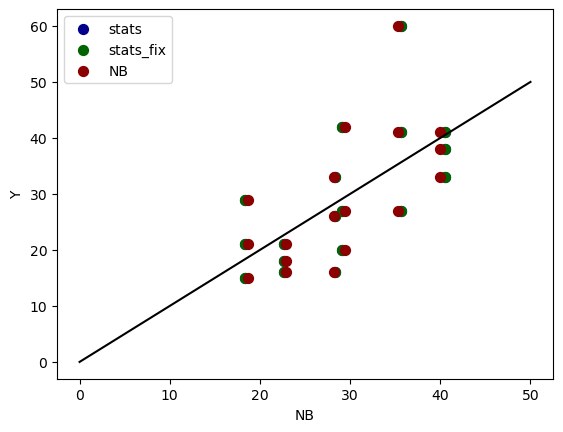

In [298]:
ax1 = df_Y.plot.scatter(x='NB_S1', y='Y', c='DarkBlue', label='stats', s=50)
ax1 = df_Y.plot.scatter(x='NB_S2', y='Y', c='DarkGreen', ax=ax1, label='stats_fix', s=50)
ax1 = df_Y.plot.scatter(x='NB', y='Y', c='DarkRed', ax=ax1, label='NB', s=50)
reference = np.linspace(0, 50, 50)
ax1.plot(reference, reference, c='black')


compare with poisson

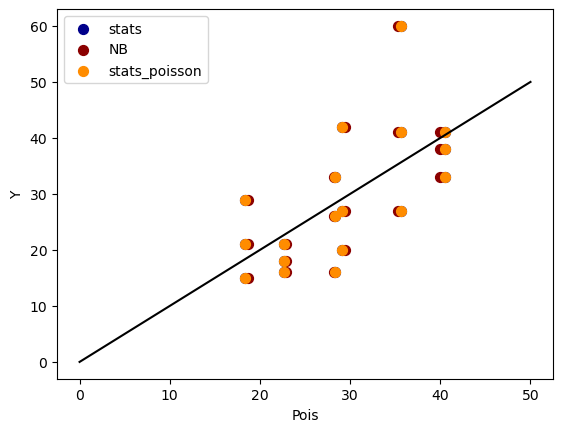

In [299]:
ax1 = df_Y.plot.scatter(x='NB_S1', y='Y', c='DarkBlue', label='stats', s=50)
ax1 = df_Y.plot.scatter(x='NB', y='Y', c='DarkRed', ax=ax1, label='NB', s=50)
ax1 = df_Y.plot.scatter(x='Pois', y='Y', c='DarkOrange', ax=ax1, label='stats_poisson', s=50)
reference = np.linspace(0, 50, 50)
ax1.plot(reference, reference, c='black')